# **Atividade Formativa 3**

## **IMPORTS**

In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn import tree, preprocessing, model_selection
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

## **Questão 1**

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Carregando a base de dados
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')
print(data) 

In [ ]:
# Recupera os valores e nomes de atrributos a partir do dataframe
val=data.values
att=data.columns

# Preparando os arrays X(atributos de entrada) e y(rótulos)
X = val[:,0:12]
y = val[:,12]
print(X.shape)
print(y.shape)

In [ ]:
# Normalização de dados
# scaler = preprocessing.StandardScaler().fit(X)
# X = scaler.transform(X)

# Normalização de dados
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)

# X = preprocessing.normalize(X, norm='l1', axis=0)     // l2
print(X)

### Decision Tree Classifier

In [ ]:
# Treina o classificador
# Definição dos parâmetros a serem avaliados

parameters = [{'max_depth': [3, 5, 10, 20], 
               'min_samples_split': [3, 5, 10], 
               'criterion':['entropy', 'gini'], 
               'splitter':['best', 'random']},]

# Separando uma parte para base de validação (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

clf_tree_class=DecisionTreeClassifier()

# GridSearch para customizar os parâmetros sobre a validação
gs = GridSearchCV(clf_tree_class, parameters, scoring = 'accuracy', cv=5, n_jobs=5)
gs.fit(X_val, y_val)

#tabulate lib
df=gs.cv_results_
print(tabulate(df, headers='keys', tablefmt='psql'))
print("Melhores parâmetros encontrados: ", gs.best_params_)

In [ ]:
# validação cruzada 10-folds
folds=10
clf_tree_class=gs.best_estimator_
result=model_selection.cross_val_score(clf_tree_class, X_train, y_train, cv=folds, n_jobs=5)
print('\nCross Validation Results %d folds:' % folds)
print('Mean accuracy: %.5f' % result.mean())
print('Std: %.5f' % result.std())

In [ ]:
# calculando saída para cada instância de teste
output_prediction = model_selection.cross_val_predict(clf_tree_class, X_train, y_train, cv=folds, n_jobs=5)

#calculando a matriz de confusão
cm=confusion_matrix(y_train, output_prediction)
print('Confusion Matrix:')
print(cm)

### KNN

In [ ]:
# Treina o classificador
# Definição dos parâmetros a serem avaliados

parameters = [{'n_neighbors': [3, 5, 7, 10, 13, 15, 17, 20], 
               'weights': ['uniform', 'distance'], 
               'algorithm': ['kd_tree', 'ball_tree'], 
               'leaf_size': [10, 20, 30],
               'p': [1, 2],
               'n_jobs': [2, 5]}]

# Separando uma parte para base de validação (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

clf_knn=KNeighborsClassifier()

# GridSearch para customizar os parâmetros sobre a validação
gs = GridSearchCV(clf_knn, parameters, scoring = 'accuracy', cv=5, n_jobs=5)
gs.fit(X_val, y_val)

#tabulate lib
df=gs.cv_results_
print(tabulate(df, headers='keys', tablefmt='psql'))
print("Melhores parâmetros encontrados: ", gs.best_params_)

In [ ]:
# validação cruzada 10-folds
folds=10
clf_knn=gs.best_estimator_
result=model_selection.cross_val_score(clf_knn, X_train, y_train, cv=folds, n_jobs=5)
print('\nCross Validation Results %d folds:' % folds)
print('Mean accuracy: %.5f' % result.mean())
print('Std: %.5f' % result.std())


Cross Validation Results 10 folds:
Mean accuracy: 0.71975
Std: 0.04525


### Naive-Bayes

In [ ]:
# Treina o classificador
# Definição dos parâmetros a serem avaliados

parameters = [{}]

# Separando uma parte para base de validação (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

clf_nb=GaussianNB()

# GridSearch para customizar os parâmetros sobre a validação
gs = GridSearchCV(clf_nb, parameters, scoring = 'accuracy', cv=5, n_jobs=5)
gs.fit(X_val, y_val)

#tabulate lib
df=gs.cv_results_
print(tabulate(df, headers='keys', tablefmt='psql'))
print("Melhores parâmetros encontrados: ", gs.best_params_)

+-----------------+----------------+-------------------+------------------+----------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+------------------+-------------------+
|   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time | params   |   split0_test_score |   split1_test_score |   split2_test_score |   split3_test_score |   split4_test_score |   mean_test_score |   std_test_score |   rank_test_score |
|-----------------+----------------+-------------------+------------------+----------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+------------------+-------------------|
|      0.00148354 |      0.0001747 |       0.000788021 |      5.41271e-05 | {}       |            0.916667 |                0.75 |            0.916667 |                0.75 |            0.666667 |               0.8 |              0.

In [ ]:
# validação cruzada 10-folds
folds=10
clf_nb=gs.best_estimator_
result=model_selection.cross_val_score(clf_nb, X_train, y_train, cv=folds, n_jobs=5)
print('\nCross Validation Results %d folds:' % folds)
print('Mean accuracy: %.5f' % result.mean())
print('Std: %.5f' % result.std())


Cross Validation Results 10 folds:
Mean accuracy: 0.76993
Std: 0.06760


## **Questão 2**

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

data=pd.read_csv('insurance.csv')

# Transformando dados categóricos para numéricos
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data['region'] = data['region'].map({'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3})
print(data) 

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       1  16884.92400
1      18    1  33.770         1       0       0   1725.55230
2      28    1  33.000         3       0       0   4449.46200
3      33    1  22.705         0       0       3  21984.47061
4      32    1  28.880         0       0       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       3  10600.54830
1334   18    0  31.920         0       0       2   2205.98080
1335   18    0  36.850         0       0       0   1629.83350
1336   21    0  25.800         0       0       1   2007.94500
1337   61    0  29.070         0       1       3  29141.36030

[1338 rows x 7 columns]


In [ ]:
# Recupera os valores e nomes de atrributos a partir do dataframe
val=data.values
att=data.columns

# Preparando os arrays X(atributos de entrada) e y(rótulos)
X = val[:,0:6]
y = val[:,6]
print(X.shape)
print(y.shape)

(1338, 6)
(1338,)


In [ ]:
# Normalização de dados
# scaler = preprocessing.StandardScaler().fit(X)
# X = scaler.transform(X)

# Normalização de dados
#scaler = preprocessing.MinMaxScaler().fit(X)
#X = scaler.transform(X)

# X = preprocessing.normalize(X, norm='l1', axis=0)

### Decision Tree Regressor

In [ ]:
parameters = [{'max_depth': [3, 5, 10, 20], 
               'min_samples_split': [3, 5, 10], 
               'criterion':['absolute_error', 'squared_error'], 
               'splitter':['best', 'random']},]

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

clf_tree_reg=DecisionTreeRegressor()

# GridSearch para customizar os parâmetros sobre a validação
gs = GridSearchCV(clf_tree_reg, parameters, scoring = 'r2', cv=5, n_jobs=5)
gs.fit(X_val, y_val)

#tabulate lib
df=gs.cv_results_
print(tabulate(df, headers='keys', tablefmt='psql'))
print("Melhores parâmetros encontrados: ", gs.best_params_)

+-----------------+----------------+-------------------+------------------+-------------------+-------------------+---------------------------+------------------+-------------------------------------------------------------------------------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+------------------+-------------------+
|   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time | param_criterion   |   param_max_depth |   param_min_samples_split | param_splitter   | params                                                                                          |   split0_test_score |   split1_test_score |   split2_test_score |   split3_test_score |   split4_test_score |   mean_test_score |   std_test_score |   rank_test_score |
|-----------------+----------------+-------------------+------------------+-------------------+-------------------+-------------------------

In [ ]:
# Validação cruzada com 10 folds
folds=10
clf_tree_class=gs.best_estimator_
y_pred = model_selection.cross_val_predict(clf_tree_reg, X, y, cv=folds)
print("\nCross Validation Results %d folds:" % folds)
print("R2 médio: %.5f" % result.mean())
print("Mean Std: %.5f" % result.std())

print("Primeira instância na base de teste apresenta valor: %d" % y_pred[0])

mae=mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE) calculado na base de teste: %.5f" % mae)


Cross Validation Results 10 folds:
R2 médio: 12104.69776
Mean Std: 11458.39108
Primeira instância na base de teste apresenta valor: 18223
Mean Absolute Error (MAE) calculado na base de teste: 3043.18740


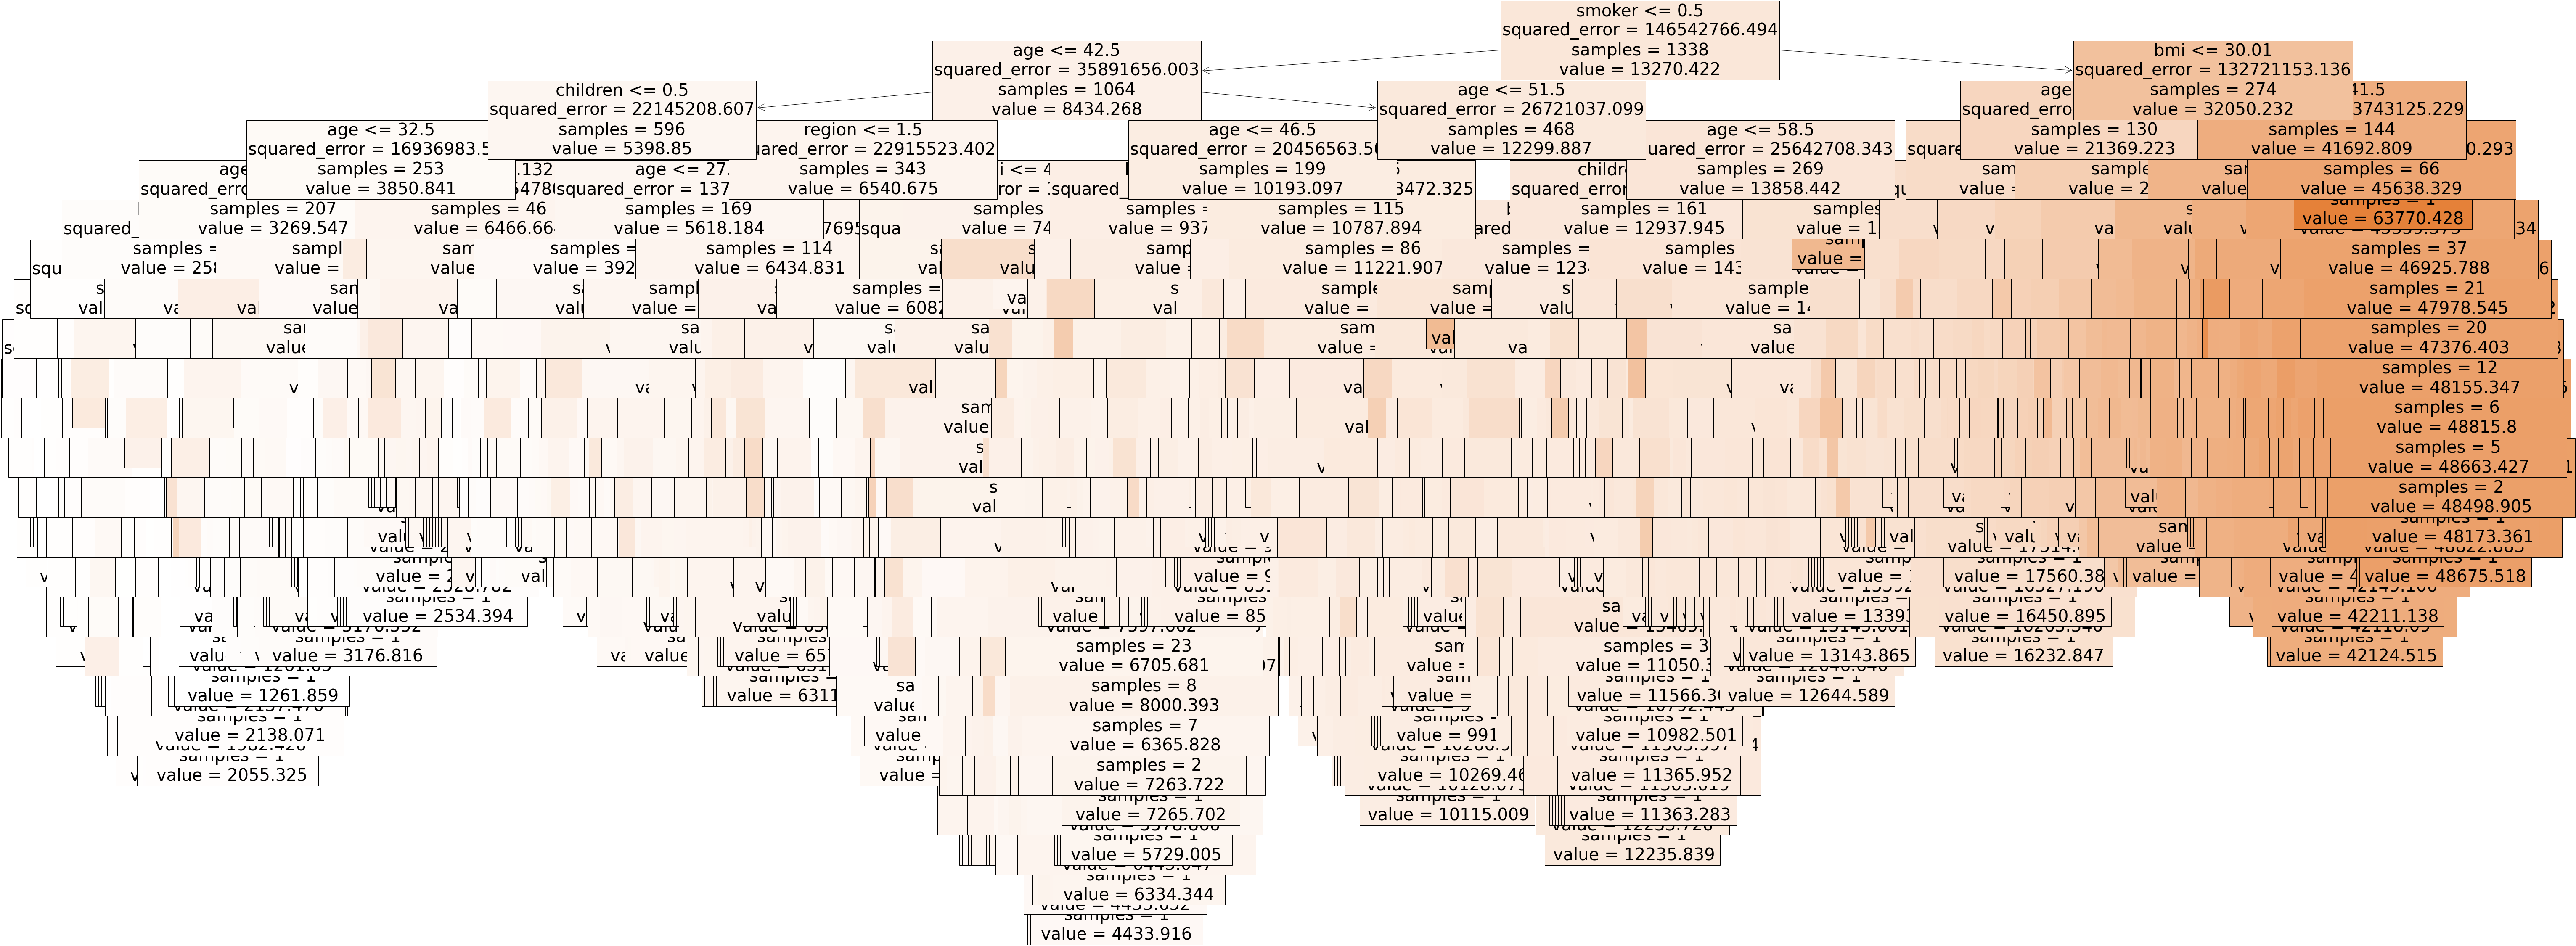

In [ ]:
# plotando a árvore após treinamento om a base toda
reg = DecisionTreeRegressor()
reg.fit(X,y)

_, ax = plt.subplots(figsize=(100,40))
x=tree.plot_tree(reg, feature_names=data.columns, filled=True, ax=ax, fontsize=40)

### KNN

In [ ]:
parameters = [{'n_neighbors': [3, 5, 7, 10, 13, 15, 17, 20], 
               'weights': ['uniform', 'distance'], 
               'algorithm': ['kd_tree', 'ball_tree'], 
               'leaf_size': [10, 20, 30],
               'p': [1, 2]}]

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

clf_knn_reg=KNeighborsRegressor()

# GridSearch para customizar os parâmetros sobre a validação
gs = GridSearchCV(clf_knn_reg, parameters, scoring = 'r2', cv=5, n_jobs=5)
gs.fit(X_val, y_val)

#tabulate lib
df=gs.cv_results_
print(tabulate(df, headers='keys', tablefmt='psql'))
print("Melhores parâmetros encontrados: ", gs.best_params_)

+-----------------+----------------+-------------------+------------------+-------------------+-------------------+---------------------+-----------+-----------------+-----------------------------------------------------------------------------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+------------------+-------------------+
|   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time | param_algorithm   |   param_leaf_size |   param_n_neighbors |   param_p | param_weights   | params                                                                                        |   split0_test_score |   split1_test_score |   split2_test_score |   split3_test_score |   split4_test_score |   mean_test_score |   std_test_score |   rank_test_score |
|-----------------+----------------+-------------------+------------------+-------------------+-------------------+-------------------

In [ ]:
# Validação cruzada com 10 folds
folds=10
clf_knn_reg=gs.best_estimator_
y_pred = model_selection.cross_val_predict(clf_knn_reg, X, y, cv=folds)
print("\nCross Validation Results %d folds:" % folds)
print("R2 médio: %.5f" % result.mean())
print("Mean Std: %.5f" % result.std())

print("Primeira instância na base de teste apresenta valor: %d" % y_pred[0])

mae=mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE) calculado na base de teste: %.5f" % mae)


Cross Validation Results 10 folds:
R2 médio: 0.76993
Mean Std: 0.06760
Primeira instância na base de teste apresenta valor: 0
Mean Absolute Error (MAE) calculado na base de teste: 0.38896


In [ ]:
# plotando a árvore após treinamento om a base toda
reg = KNeighborsRegressor()
reg.fit(X,y)

_, ax = plt.subplots(figsize=(100,40))
x=tree.plot_tree(reg, feature_names=data.columns, filled=True, ax=ax, fontsize=40)